In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os


IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10
DATASET_PATH = 'C:/Users/kaush/Downloads/FADC-Dataset-main/FADC-Dataset-main/FADC DATASET'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

train_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze base


x = base_model.output 
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(train_gen, validation_data=val_gen, epochs=10)
model.save("mobilenet_fadc_asd_model.h5")


Found 6337 images belonging to 2 classes.
Found 1584 images belonging to 2 classes.
Epoch 1/10
199/199 [==============================] - 178s 807ms/step - loss: 0.2588 - accuracy: 0.8981 - val_loss: 0.1023 - val_accuracy: 0.9779
Epoch 2/10
199/199 [==============================] - 84s 421ms/step - loss: 0.1246 - accuracy: 0.9571 - val_loss: 0.0788 - val_accuracy: 0.9798
Epoch 3/10
199/199 [==============================] - 85s 427ms/step - loss: 0.0924 - accuracy: 0.9694 - val_loss: 0.0669 - val_accuracy: 0.9817
Epoch 4/10
199/199 [==============================] - 85s 429ms/step - loss: 0.0784 - accuracy: 0.9752 - val_loss: 0.0768 - val_accuracy: 0.9741
Epoch 5/10
199/199 [==============================] - 86s 433ms/step - loss: 0.0663 - accuracy: 0.9784 - val_loss: 0.0674 - val_accuracy: 0.9779
Epoch 6/10
199/199 [==============================] - 88s 440ms/step - loss: 0.0580 - accuracy: 0.9823 - val_loss: 0.0556 - val_accuracy: 0.9830
Epoch 7/10
199/199 [=========================

C:\Users\kaush\.conda\envs\Tf_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


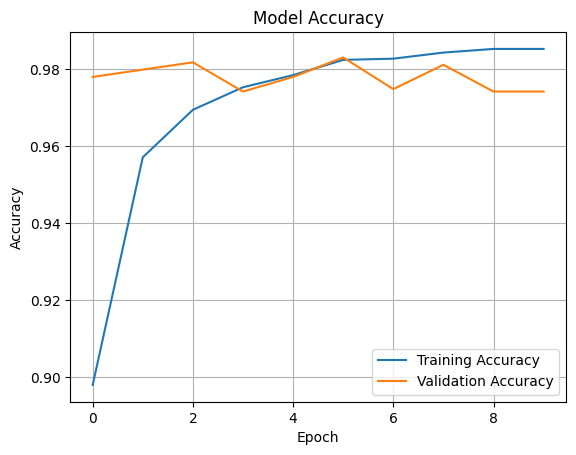

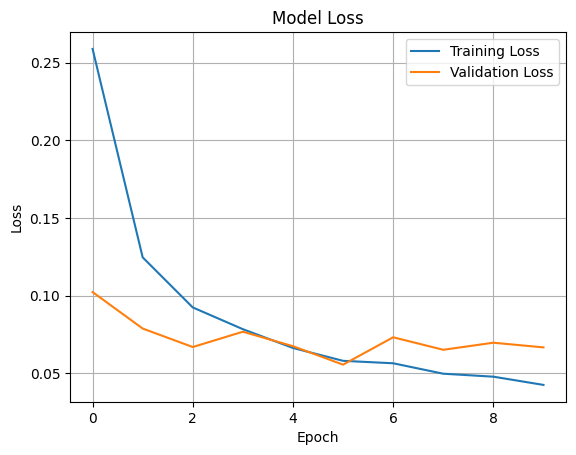

In [3]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
loss, acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {acc * 100:.2f}%")

50/50 [==============================] - 14s 280ms/step - loss: 0.0705 - accuracy: 0.9766
Validation Accuracy: 97.66%


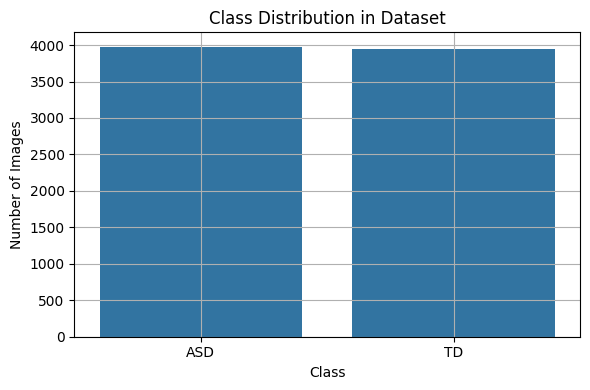

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Count images in each class folder
class_counts = {}
for class_name in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution in Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch-wise Training and Validation Results:
      loss  accuracy  val_loss  val_accuracy
1   0.2588    0.8981    0.1023        0.9779
2   0.1246    0.9571    0.0788        0.9798
3   0.0924    0.9694    0.0669        0.9817
4   0.0784    0.9752    0.0768        0.9741
5   0.0663    0.9784    0.0674        0.9779
6   0.0580    0.9823    0.0556        0.9830
7   0.0565    0.9826    0.0732        0.9747
8   0.0497    0.9842    0.0651        0.9811
9   0.0478    0.9852    0.0697        0.9741
10  0.0425    0.9852    0.0667        0.9741


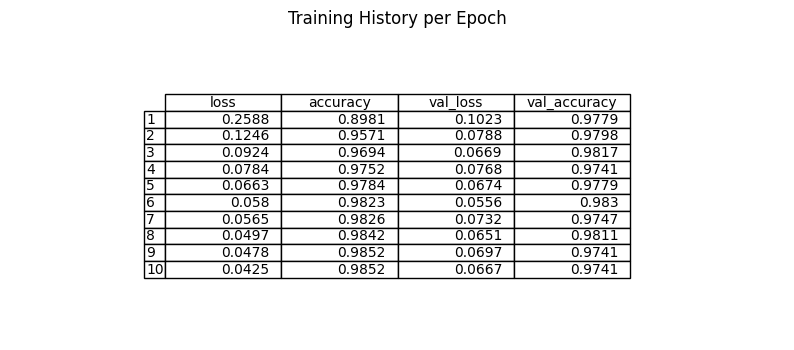

In [19]:
import pandas as pd

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)
history_df.index += 1  # Start epoch numbering at 1

# Round values for cleaner display
history_df = history_df.round(4)

# Display the table
print("Epoch-wise Training and Validation Results:")
print(history_df)

# Optional: Display as an actual table in notebook
import matplotlib.pyplot as plt
from pandas.plotting import table

plt.figure(figsize=(10, 4))
plt.axis('off')
tbl = table(plt.gca(), history_df, loc='center', colWidths=[0.15]*len(history_df.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
plt.title("Training History per Epoch", fontsize=12)
plt.show()


In [ ]:


import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np  # Make sure this is imported

IMG_SIZE = 224  # or whatever you used in training
test_dir = 'C:/Users/kaush/Downloads/test_folder'  

for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = tf.expand_dims(img_array, axis=0)  # Expand dims using TensorFlow

    # Predict
    prediction = model.predict(img_array)

    # Display result
    label = "ASD" if prediction[0][0] < 0.5 else "TD"
    print(f"{img_name}: Predicted -> {label}")


963 copy.jpg: Predicted -> ASD
963.jpg: Predicted -> ASD
964.jpg: Predicted -> ASD
966.jpg: Predicted -> ASD
968.jpg: Predicted -> ASD
97.jpg: Predicted -> ASD
98 copy 2.jpg: Predicted -> ASD
98 copy.jpg: Predicted -> ASD
98.jpg: Predicted -> ASD
99 copy 2.jpg: Predicted -> ASD
99 copy.jpg: Predicted -> ASD
99.jpg: Predicted -> ASD
ee1b422d.jpg: Predicted -> TD
en1rol-banner-3.jpg: Predicted -> TD
enr4ol-banner-3.jpg: Predicted -> TD
enrol-banner-3.jpg: Predicted -> TD
enrol-banner-33.jpg: Predicted -> TD
featured-image-schools-nurseries-1.jpg: Predicted -> TD
fgn.jpg: Predicted -> TD
fu.jpg: Predicted -> TD
getty_rf_photo_of_boy_having_ear_exam.jpg: Predicted -> TD
getty_rf_photo_of_girl_getting_ear_drops.jpg: Predicted -> TD
ghi.jpg: Predicted -> TD
gnfg.jpg: Predicted -> TD
png-clipart-school-uniform-clothing-elementary-scho6ol-school-child-girl.jpg: Predicted -> TD
png-clipart-school-uniform-clothing-elementary-school-school-child-girl.jpg: Predicted -> TD
png-clipart-school-unifor